In [12]:
# An example code to demonstrate the use of the grounded sam2 api

In [1]:
%cd ..

/home/appuser/Grounded-SAM-2


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
from pathlib import Path

import numpy as np
import requests
from PIL import Image

from src.user_interface.grounded_sam import SegmentReuqest
from src.utils.image import pil2base64

In [3]:
image_path = Path("tests/data/sample_image.png")
image = Image.open(image_path)
segment_request = SegmentReuqest(
    image=pil2base64(image),
    text="product.",
)

In [4]:
segment_response = requests.post(
    url="http://localhost:58080/segment",
    json=segment_request.model_dump(),
)

In [6]:
mask_ar = np.uint8(np.array(segment_response.json()["masks"]))

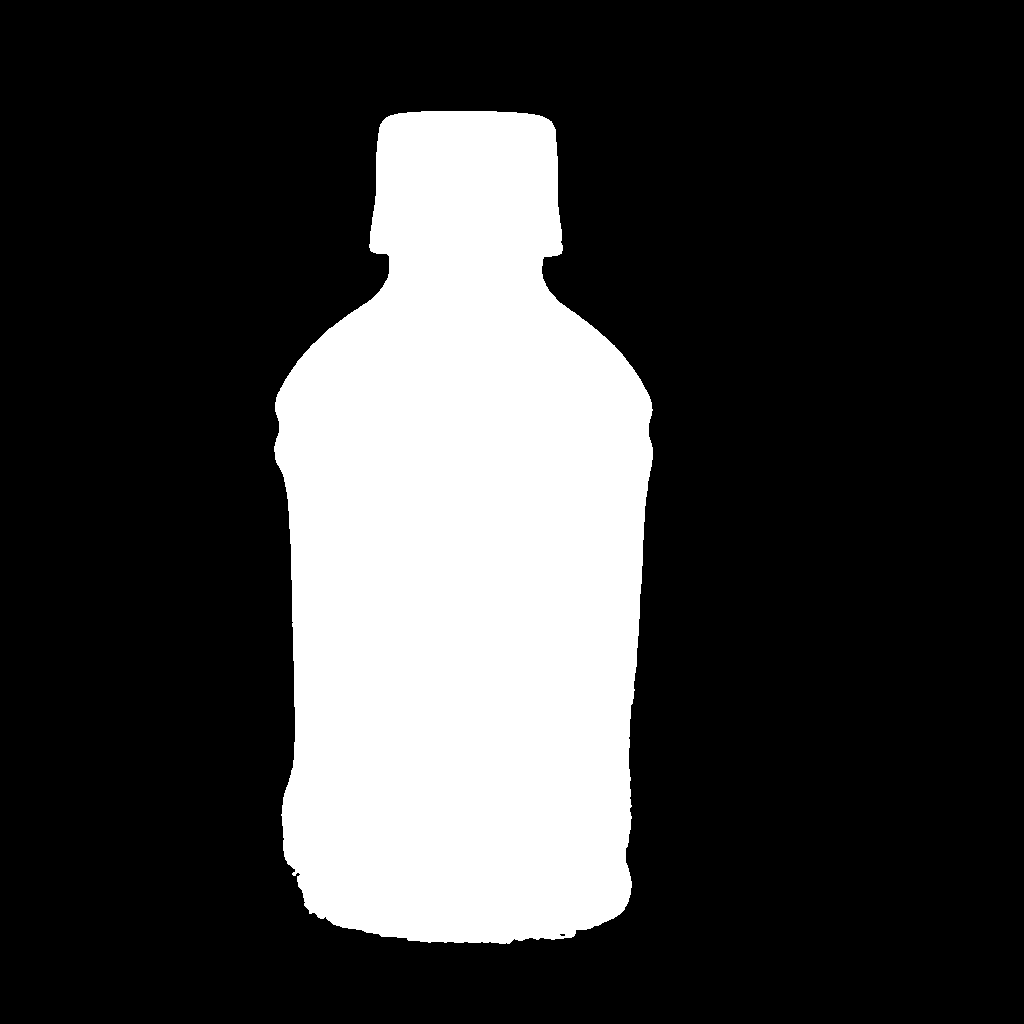

In [7]:
mask = Image.fromarray(mask_ar[0])
mask

In [10]:
segmented_image = Image.composite(
    image1=image,
    image2=Image.new("RGBA", image.size),
    mask=mask,
)

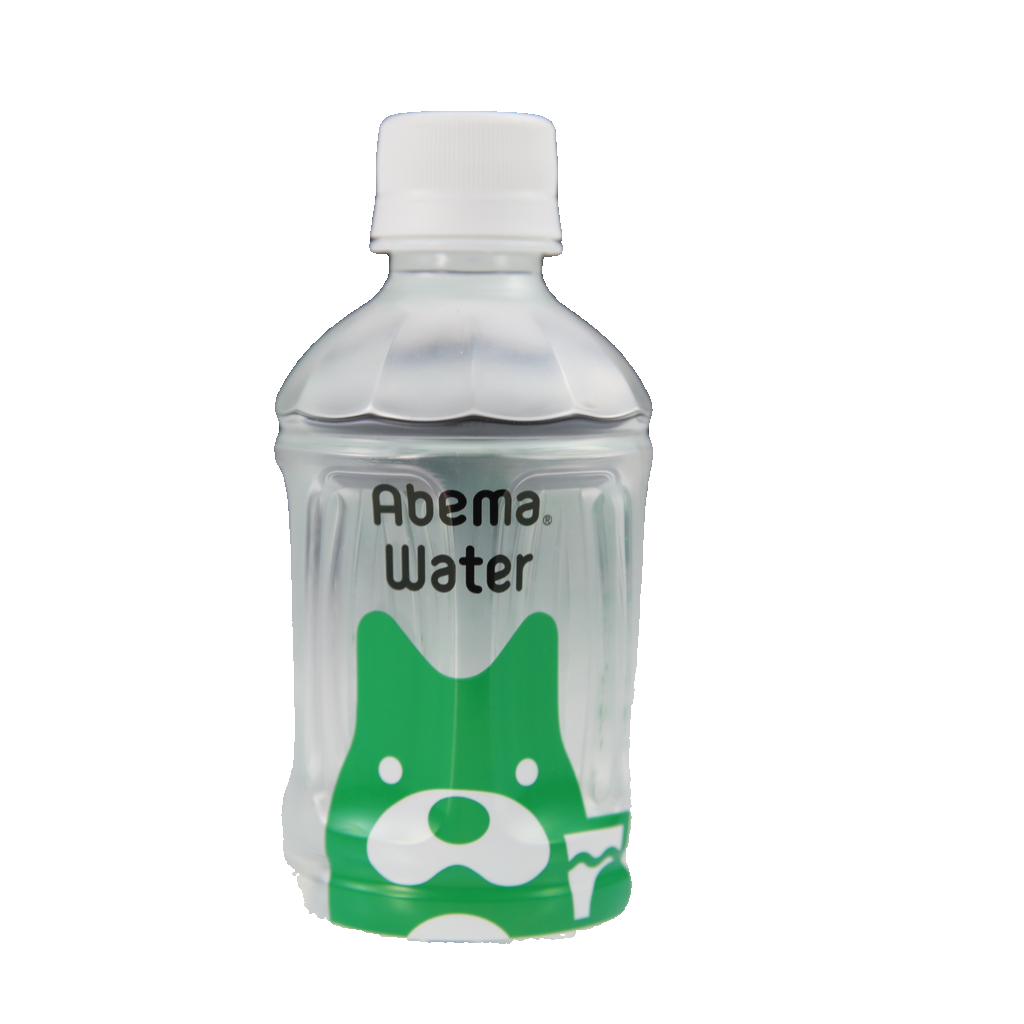

In [11]:
segmented_image